# 디지털 마케팅 광고 효과 분석 프로젝트

## 데이터 셋 개요
이 데이터 셋은 디지털 마케팅 캠페인과 고객의 상호 작용에 대한 데이터입니다. 이 데이터 셋에는 인구 통계 데이터, 마케팅 관련 지표, 고객 참여 지표, 과거 구매 데이터가 포함되어 있어 디지털 마케팅 영역의 예측 모델링 및 분석에 적합합니다.

## 분석 개요
디지털 마케팅과 관련한 데이터 셋을 이용하여 디지털 마케팅에 대한 이해도를 높이고 전략을 제시하기 위한 목적입니다.

## 문제 정의
디지털 마케팅 광고 효과 분석을 통해 디지털 마케팅의 이해를 중점하기 때문에 이를 위주로 문제를 정의하였습니다.


Q1. 어떤 디지털 채널이 가장 전환이 높았는지? 그에 따른 비용차이는 얼마나 나는지? 채널마다 차이는 있는지?

Q2. 각 마케팅 캠페인 별 효과가 좋았던 채널은 어디인지?


Q3. 디지털 마케팅 캠페인 코호트 분석을 통해 어떤 인구통계학적 특성을 지닌 사람들이 전환율이 가장 높은지? 인구통계학적 특성이 다르면 채널에 따른 전환율도 차이를 보이는지?


Q4. 전환율에 가장 영향을 끼치는 인자는 어떤 것이었는지? (상관관계 분석과 통계적 검정을 통해 입증)


Q5. 어떤 캠페인 채널에 집중해야할 지?


## 고민된 점
1. 지표를 만들 때 무작정으로 스케일링을 하는 것이 좋을 지에 대한 의문. -> Royalty Points의 경우, 보통 제품을 구매하거나 리뷰를 쓴다거나 브랜드에 더 관심을 많이 가진 경우 포인트가 올라가는 경우가 대부분일 것이라고 생각했기 때문에 더 많은 비중으로 반영되어야 된다고 생각해서 스케일링을 하지 않은 체 지표를 계산

2. 브랜드 관심도 지표를 만들기 위해 관심도를 대변하는'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite','EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'들에 가중치를 부여할 때, 어떻게 가중치를 부여해야 할지 의문. -> 마케팅, 브랜드 관심도 관련 아티클이나 전문가의 의견을 참고하여 가중치를 부여하려고 했으나, 관련 아티클을 찾지 못해 실패. 따라서, 다중회귀분석을 실시하여 브랜드의 계수를 곱하고 상수를 더하는 식으로 가중치를 줘서 브랜드 관심도 지표를 만듦.

## 한계점
1. 데이터 상 Conversion에 해당하는 컬럼이 정확히 어떤 것을 뜻하는 지를 밝혀지지 않아서, 구매라고 가정하여 분석을 진행함.
2. 각각의 마케팅 채널에서 어떤 소재/시간/마케팅 방식 등을 가지고 마케팅을 진행했는 지 전혀 알 수가 없기 때문에, 채널/캠페인/인적 사항 등에 따른 문제라는 1차원적인 방편으로 인사이트를 도출할 수 밖에 없음.

데이터 셋 개요

| Columns     | :Description:                                        |
| :------------: | :--------------------------------------------------: |
| `CustomerID` |각 고객에 대한 고유 식별자                  |
| `Age`   | 각 고객에 대한 나이  |
| `Gender' | 각 고객의 성별                   |
| `Income`   | 각 고객의 수입  |
| `AdSpend` | 고객의 연간 수입(USD)                  |
| `CampaignChannel` | 마케팅 캠페인이 전달되는 채널(이메일, 소셜 미디어, SEO, PPC, 리퍼럴)|
| `CampaignType`   | 마케팅 캠페인 유형(인지도, 고려, 전환, 리텐션)|
| `AdSpend` | 마케팅 캠페인에 지출한 금액(USD)                 |
| `ClickThroughRate`   |고객이 마케팅 콘텐츠를 클릭하는 비율 |
| `ConversionRate` | 클릭이 원하는 액션(예: 구매)으로 전환되는 비율|
| `WebsiteVisits`   | 웹사이트 방문 횟수 |
| `PagesPerVisit`   | 세션당 평균 방문 페이지 수|
| `TimeOnSite` | 방문당 평균 웹사이트 체류 시간(분) |
| `SocialShares`   |마케팅 콘텐츠가 소셜 미디어에서 공유된 횟수|
| `EmailOpens` | 마케팅 이메일을 열어본 횟수 |
| `EmailClicks`   | 마케팅 이메일의 링크를 클릭한 횟수|
| `PreviousPurchases`   | 고객의 이전 구매 횟수|
| `LoyaltyPoints` | 고객이 적립한 로열티 포인트 수|
| `Conversion` |고객이 전환했는지 여부(1)를 나타내는 이진 변수|



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 데이터 프레임 불러오기
df = pd.read_csv('/content/drive/MyDrive/digital_marketing_campaign_dataset.csv')
df['CampaignType'].unique()

array(['Awareness', 'Retention', 'Conversion', 'Consideration'],
      dtype=object)

# 데이터 전처리

In [ ]:
# null 값은 존재하지 않음, 결측치도 존재하지 않음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [ ]:
# AdvertisingPlatform과 AdvertisingTool의 경우는 값이 없으므로 drop

print(df[['AdvertisingPlatform', 'AdvertisingTool']])
df.drop(columns=['AdvertisingPlatform','AdvertisingTool'], inplace=True)

     AdvertisingPlatform AdvertisingTool
0               IsConfid      ToolConfid
1               IsConfid      ToolConfid
2               IsConfid      ToolConfid
3               IsConfid      ToolConfid
4               IsConfid      ToolConfid
...                  ...             ...
7995            IsConfid      ToolConfid
7996            IsConfid      ToolConfid
7997            IsConfid      ToolConfid
7998            IsConfid      ToolConfid
7999            IsConfid      ToolConfid

[8000 rows x 2 columns]


In [ ]:
# Age 범주화
# 최소 18세부터 최대 69세까지 있으니, 18세부터 25, 26부터 35, 36부터 45 .. 순으로 그룹화해준다.

print(df['Age'].describe())

def age_convert(x):
    if x <=25:
        return '<25'
    elif x <=35:
        return '<35'
    elif x <=45:
        return '<45'
    elif x <=55:
        return '<55'
    elif x <=65:
        return '<65'
    else:
        return '>66'

df['Age'] = df['Age'].apply(age_convert)

count    8000.000000
mean       43.625500
std        14.902785
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64


In [ ]:
# 소득 범주화
# 최소 20000달러부터 최대 145000달러까지 있으니,그룹화해준다.

df['Income'].describe()

def income_convert(x):
    if x <=25000:
        return '<25k'
    elif x <=35000:
        return '<35k'
    elif x <=45000:
        return '<45k'
    elif x <=55000:
        return '<55k'
    elif x <=65000:
        return '<65k'
    elif x<=75000:
        return '<75k'
    elif x<=85000:
        return '<85k'
    elif x<=95000:
        return '<95k'
    elif x<=105000:
        return '<105k'
    elif x<=115000:
        return '<115k'
    elif x<=125000:
        return '<125k'
    elif x<=135000:
        return '<135k'
    else:
        return '<145k'

df['Income'] = df['Income'].apply(income_convert)

In [ ]:
# 데이터 라벨 인코딩하기

gender_order = ['Male','Female']
age_order = ['<25', '<35', '<45', '<55', '<65', '>66']
income_order = ['<25k', '<35k', '<45k', '<55k', '<65k',
             '<75k', '<85k', '<95k', '<105k', '<115k',
             '<125k', '<135k', '<145k']
channel_order = ['Social Media', 'Email', 'PPC', 'Referral', 'SEO']
campaign_order = ['Awareness', 'Retention','Consideration', 'Conversion']


df['Gender'] = pd.Categorical(df['Gender'], categories=gender_order, ordered=True)
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
df['Income'] = pd.Categorical(df['Income'], categories=income_order, ordered=True)
df['CampaignChannel'] = pd.Categorical(df['CampaignChannel'], categories=channel_order, ordered=True)
df['CampaignType'] = pd.Categorical(df['CampaignType'], categories=campaign_order, ordered=True)

df['Gender_cat'] = df['Gender'].cat.codes
df['Age_cat'] = df['Age'].cat.codes
df['Income_cat'] = df['Income'].cat.codes
df['CampaignChannel_cat'] = df['CampaignChannel'].cat.codes
df['CampaignType_cat'] = df['CampaignType'].cat.codes

In [ ]:
# 최종 데이터 셋
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerID           8000 non-null   int64   
 1   Age                  8000 non-null   category
 2   Gender               8000 non-null   category
 3   Income               8000 non-null   category
 4   CampaignChannel      8000 non-null   category
 5   CampaignType         8000 non-null   category
 6   AdSpend              8000 non-null   float64 
 7   ClickThroughRate     8000 non-null   float64 
 8   ConversionRate       8000 non-null   float64 
 9   WebsiteVisits        8000 non-null   int64   
 10  PagesPerVisit        8000 non-null   float64 
 11  TimeOnSite           8000 non-null   float64 
 12  SocialShares         8000 non-null   int64   
 13  EmailOpens           8000 non-null   int64   
 14  EmailClicks          8000 non-null   int64   
 15  PreviousPurchases    

# 상관관계 분석
- 전환율에 영향을 끼치는 인자들 중에 크게 유의미 있는 인자들은 보이지 않음
- 계수를 0.1 이상으로 하면 AdSpend, ClickThroughRate, ConversionRate, PagePerVisit, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints가 전환율에 영향을 끼친다고 볼 수 있음

<Axes: >

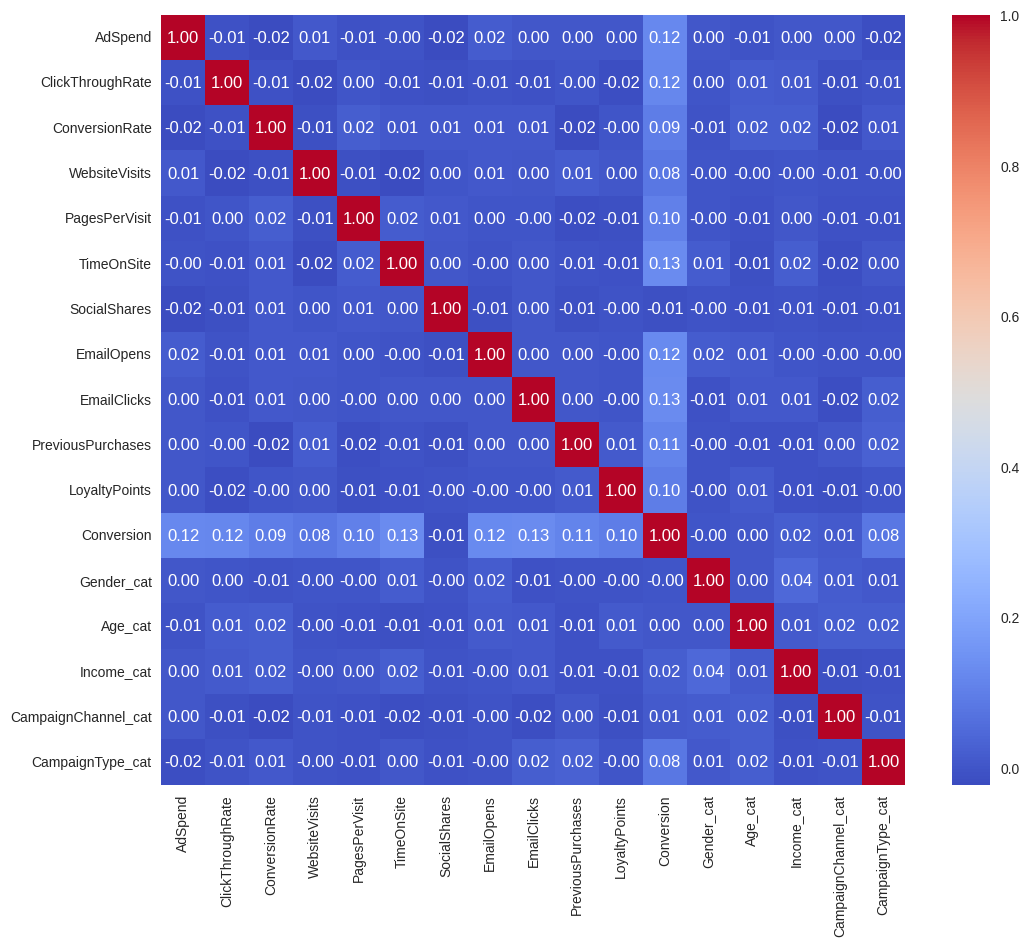

In [ ]:
# 상관관계 분석
plt.figure(figsize=(12,10))
sns.heatmap(df.iloc[:,6:23].corr(), annot=True, fmt=".2f", cmap='coolwarm')

# 어떤 디지털 채널을 통한 마케팅 캠페인이 가장 구매율(전환)이 높았는지? 채널마다 차이는 있는지?

**- 모든 채널은 모두 Paid media임**

    - PPC <- 클릭 당 비용 지불 광고 모델 (Paid Media)
    - SEO <- 검색 엔진을 통해 광고 과금 모델 (Paid Media)
    - 리퍼럴 <- 추천을 통해 유입됨 (Paid Media)
    - 이메일 <- 이메일 발송량에 따라 과금 됨 (Paid Media)



- 모든 매체에서 마케팅 캠페인을 펼쳤을 때, 전환 마케팅의 경우가 가장 효과가 좋음.
- Awareness, Retention, Consideration 마케팅의 경우 채널별로 큰 차이가 없음을 볼 수 있음.
- 그러나, AdSpend(광고 비용)에 따라 Conversion에 차이 나는지 확인해야 더 알수 있을 것 같음

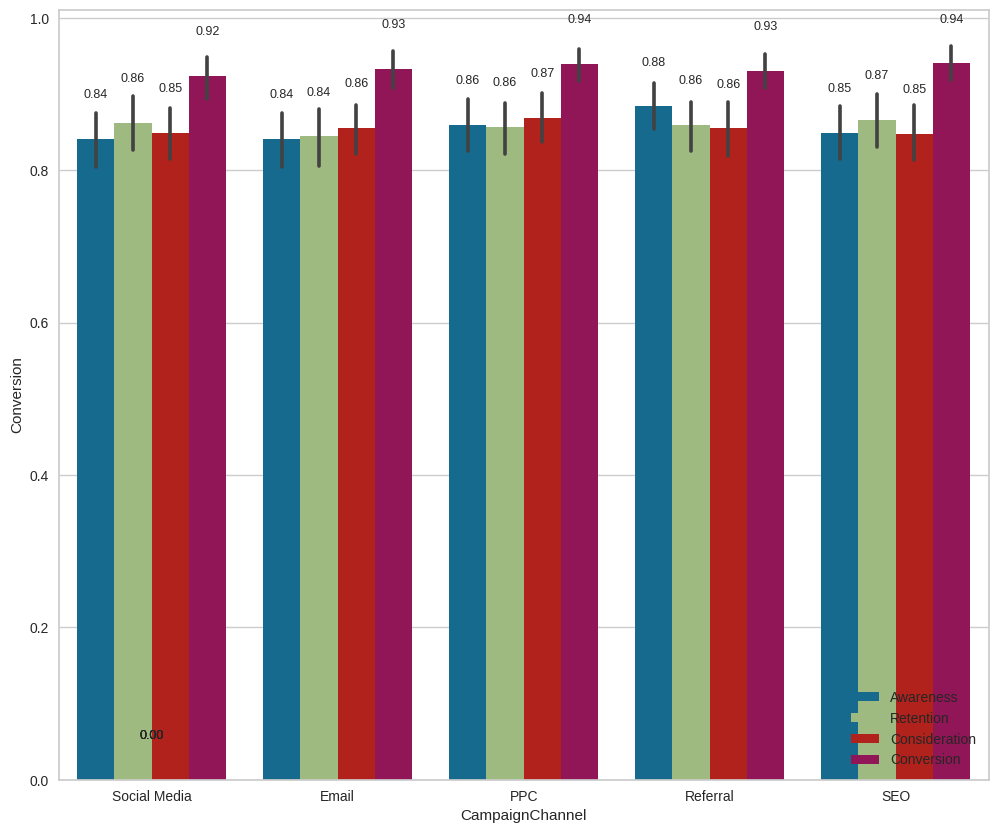

In [ ]:
# 광고 채널 별로 광고 캠페인에 대한 Conversion 비교하기
# 모든 캠페인에서 Conversion의 경우가 가장 많이 일어남
# 캠페인 종류인 Awareness, Retention, Consideration에서는 Conversion에 대한 큰 차이가 없음
# 그러나, AdSpend(광고 비용)에 따라 Conversion에 차이 나는지 확인해야 더 알수 있을 것 같음

plt.figure(figsize=(12,10))
ax = sns.barplot(df, x='CampaignChannel', y='Conversion', hue='CampaignType')
plt.legend(loc='lower right')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중심
        p.get_height() + 0.05,  # 막대 위 조금 위
        f'{p.get_height():.2f}',  # 소수점 2자리
        ha='center', va='bottom', size=9  # 텍스트 정렬
    )

**가장 구매율(전환)이 높은 채널**
- Referral, PPC, SEO, Email, Social Media 순
- 그러나 전환율에 있어서 모든 채널이 큰 차이를 보이진 않는다.

<ipython-input-136-595c1abb4195>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_conversion = df.groupby(['CampaignChannel'])['Conversion'].value_counts(normalize=True).reset_index()


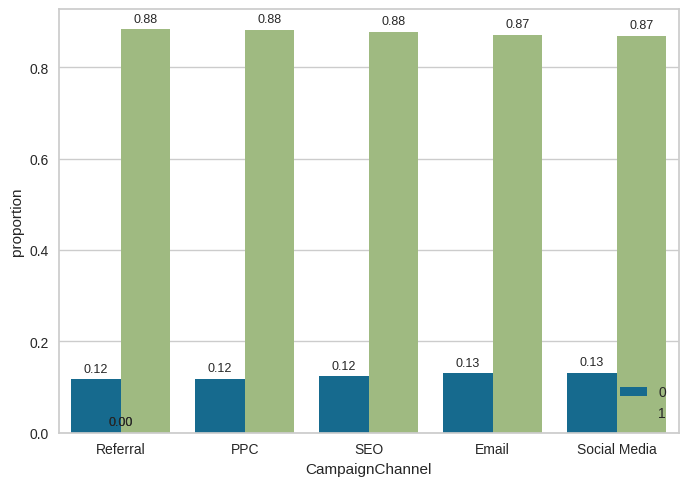

In [ ]:
# 가장 전환이 많이 일어난 채널은?
channel_conversion = df.groupby(['CampaignChannel'])['Conversion'].value_counts(normalize=True).reset_index()
ax = sns.barplot(channel_conversion, x='CampaignChannel', y='proportion', hue='Conversion', order = channel_conversion.sort_values(by='proportion').CampaignChannel)
plt.legend(loc='lower right')
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # 막대의 중심
        p.get_height() + 0.01,  # 막대 위 조금 위
        f'{p.get_height():.2f}',  # 소수점 2자리
        ha='center', va='bottom', size=9  # 텍스트 정렬
    )

**명 당 Conversion 비용**
- 1명 당 Conversion 비용은 Referral이 가장 효율이 좋다. (평균 5,088달러)
- PPC(5,088), Social Media(5,118), SEO(5,145), Refferal(5,146), Email(5,171)

**종합:**

1. Conversion의 명 당 비용 효율, 전환을 고려했을 때, PPC(클릭 당 광고 지불)가 가장 효과적인 미디어이며, 순서대로 PPC, Social Media, SEO, Refferal, Social Media로 이어진다.
2. 뿐만 아니라, 모든 미디어가 비슷한 마케팅에 따른 성공률을 보이고 있지만, 그 중에서도 PPC가 근사하게 마케팅에 따른 전환율이 다른 미디어들 보다 높다.


**한계:**

Conversion이 정확한 어떤 이벤트인지 데이터 상 어떤 것을 의미하는 지 표기되지 않았다.


어떤 Conversion 마케팅인지 모른다.

<ipython-input-137-99ef5d289f9c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spend_by_channel = temp.groupby(['CampaignChannel'])['AdSpend'].sum().reset_index()
<ipython-input-137-99ef5d289f9c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_media = temp.groupby(['CampaignChannel'])['CustomerID'].count().reset_index()


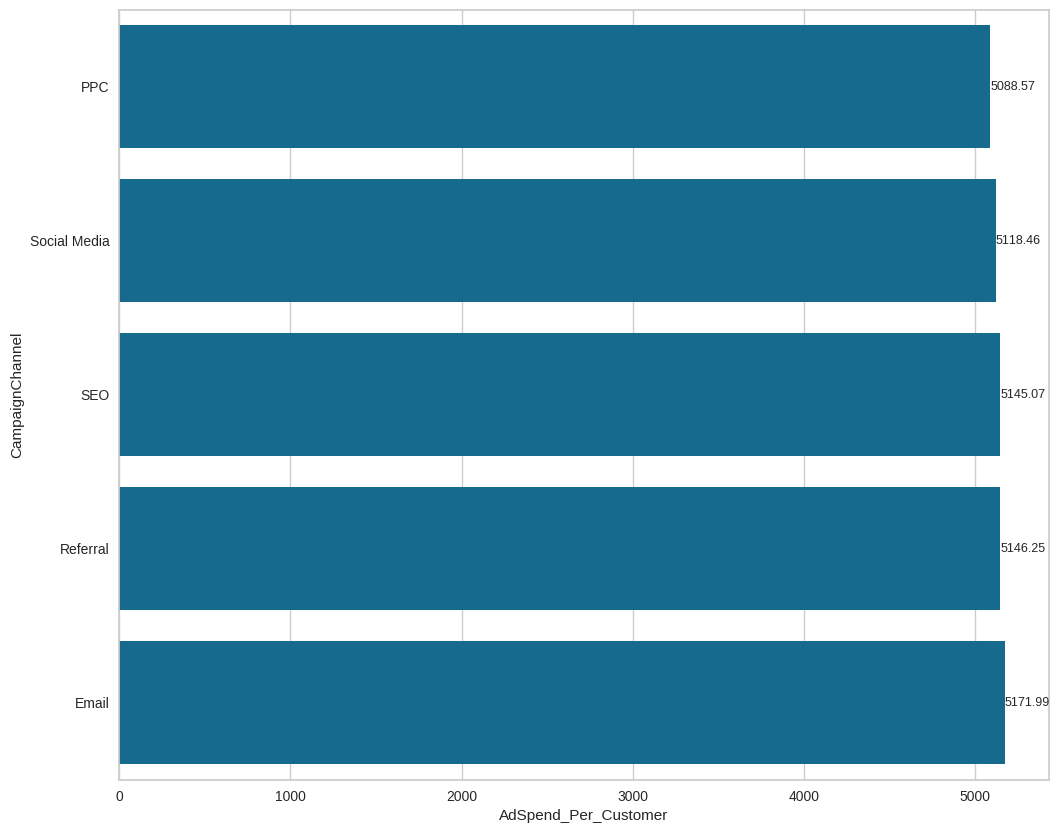

In [ ]:
# AdSpend(광고 비용)에 따른 매체의 Conversion은?

plt.figure(figsize=(12, 10))
temp = df[df['Conversion']==1]
spend_by_channel = temp.groupby(['CampaignChannel'])['AdSpend'].sum().reset_index()
customer_media = temp.groupby(['CampaignChannel'])['CustomerID'].count().reset_index()
chan_cusomer_by_adspend = pd.merge(spend_by_channel, customer_media, on='CampaignChannel').rename(columns={'CustomerID':'CustomerCount'})
chan_cusomer_by_adspend['AdSpend_Per_Customer'] = chan_cusomer_by_adspend['AdSpend'] / chan_cusomer_by_adspend['CustomerCount']

ax = sns.barplot(
    chan_cusomer_by_adspend,
    x='AdSpend_Per_Customer',
    y='CampaignChannel',
    orient='h',
    order=chan_cusomer_by_adspend.sort_values(by='AdSpend_Per_Customer', ascending=True).CampaignChannel
)

for p in ax.patches:
    ax.text(
        p.get_width() + 0.05,  # 바 끝에서 약간 떨어진 위치
        p.get_y() + p.get_height() / 2,  # 바의 세로 중앙
        f'{p.get_width():.2f}',  # 소수점 2자리로 표시
        ha='left', va='center', size=9
    )

plt.show()


- 행동의 직접성 (Direct Engagement)

    - 브랜드와 직접적인 상호작용 정도.
    - 예: WebsiteVisits, EmailClicks는 더 높은 가중치.

- 행동의 지속성 (Sustained Interaction)

    - 사용자의 장기적 참여를 반영.
    - 예: LoyaltyPoints, PreviousPurchases는 높은 가중치.

- 의도의 강도 (Intent Strength)

    - 관심이 얼마나 강한지 측정.
    - 예: PagesPerVisit, TimeOnSite는 중간 가중치.

- 공유와 확산 (Amplification Potential)

    - 브랜드 노출을 확장할 가능성.
    - 예: SocialShares는 낮은 가중치.



- 예시 가중치 설정:
    - WebsiteVisits: 0.15
    - PagesPerVisit: 0.10
    - TimeOnSite: 0.10
    - SocialShares: 0.05
    - EmailOpens: 0.10
    - EmailClicks: 0.15
    - PreviousPurchases: 0.20
    - LoyaltyPoints: 0.15

# Q3. 디지털 마케팅 고객 세분화 분석을 통해 어떤 특성을 지닌 사람들이 제품 구매율이 가장 높은지?

군집 분석, 다중회귀 분석을 이용하여 어떤 인자가 전환(구매)에 영향을 끼치는 지 확인하고, 군집별로 마케팅 방법에 따라 어떤 광고 효과가 일어났는지 확인한다. 또한, 광고 효과를 확인해서 그 군집은 어떤 특성을 지녔는지 확인한다.

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# 지표 상관관계 분석을 통해 얻은 계수를 통해 얻은 근거로 가중치를 설정
# LoyaltyPoints의 경우 수치가 큼. 따라서 모든 데이터 프레임 스케일링

#scaler = StandardScaler()
#df[['WebsiteVisits','PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']] = scaler.fit_transform(df[['WebsiteVisits','PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']])
#df[['WebsiteVisits','PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']].describe()

In [ ]:
#'Social Share의 경우 분석 결과 p값 0.05 이상으로 유효하지 않은 변수 -> 제거
# 전환에 영향을 끼치는 인자는 WebsiteVisits, PagesPerVisit, TimeOnsite, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints임.
#
import statsmodels.api as sm

X = df[['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
        'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']]
y = df['Conversion']

# 상수항 추가 (회귀 분석에 필요)
X = sm.add_constant(X)

# OLS 회귀 분석 모델 생성 및 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Conversion   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     96.78
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          2.50e-154
Time:                        07:26:27   Log-Likelihood:                -2088.3
No. Observations:                8000   AIC:                             4195.
Df Residuals:                    7991   BIC:                             4257.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4364      0.01

In [ ]:
#브랜드 관심도 지표 만들기
df['WebsiteVisits'] = df['WebsiteVisits']*0.026 + 0.876
df['PagesPerVisit'] = df['PagesPerVisit']*0.034 + 0.876
df['TimeOnSite'] = df['TimeOnSite']*0.043 + 0.876
df['EmailOpens'] = df['EmailOpens']*0.041 + 0.876
df['EmailClicks'] = df['EmailClicks']*0.042 + 0.876
df['PreviousPurchases']= df['PreviousPurchases']*0.036 + 0.876
df['LoyaltyPoints'] = df['LoyaltyPoints']*0.031 + 0.876
df['BrandInterest'] = df['WebsiteVisits'] + df['PagesPerVisit'] + df['TimeOnSite'] + df['EmailOpens'] + df['EmailClicks'] + df['PreviousPurchases'] + df['LoyaltyPoints']

Income_cat       0
Age_cat          0
Awareness        0
Retention        0
Consideration    0
Conversion       0
Gender_cat       0
count            0
BrandInterest    0
dtype: int64


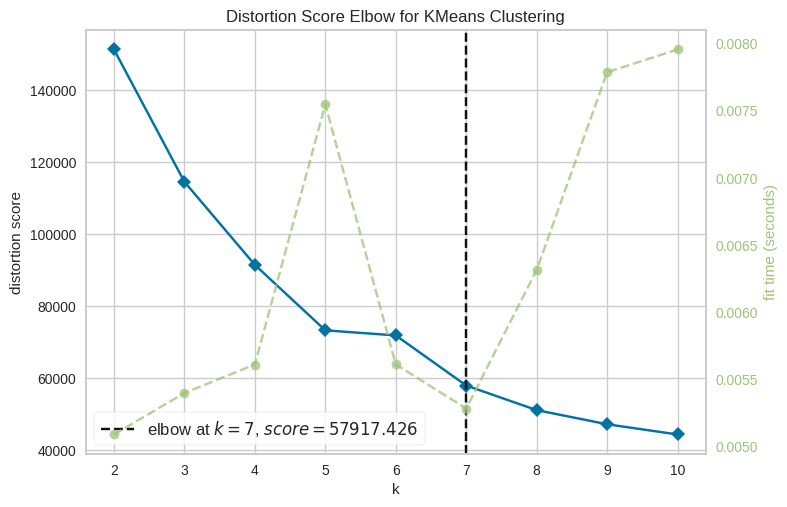

In [ ]:
#클러스터 만들기
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

df_type = df.groupby(['Income_cat', 'Age_cat', 'CampaignType'], observed=True)['Conversion'].mean().unstack().reset_index()
df_channel = df.groupby(['Income_cat', 'Age_cat', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack().reset_index()
df_brand_interest = df.groupby(['Income_cat','Age_cat'], observed=True)['BrandInterest'].mean().reset_index()
df_gender_count = df.groupby(['Income_cat','Age_cat'])['Gender_cat'].value_counts().reset_index()
df_campaign_conversion = pd.merge(df_type, df_gender_count, how='inner', on=['Income_cat','Age_cat'])
df_campaign_conversion = pd.merge(df_campaign_conversion, df_brand_interest, how='inner', on=['Income_cat','Age_cat'])
df_channel_conversion = pd.merge(df_channel, df_gender_count, how='inner', on=['Income_cat','Age_cat'])
df_channel_conversion = pd.merge(df_channel_conversion, df_brand_interest, how='inner', on=['Income_cat','Age_cat'])
df_conversion = pd.merge(df_campaign_conversion, df_channel_conversion, how='inner', on=['Income_cat','Age_cat'])


#적절한 군집 개수를 찾아주는 패키지 임포트
print(df_campaign_conversion.isna().sum())

# 결측값 제거 (행 단위)
df_conversion = df_conversion.dropna()

# 또는 결측값을 특정 값으로 대체 (예: 0)
df_conversion = df_conversion.fillna(0)

# 적절한 군집 개수를 찾아주는 패키지 임포트
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_conversion)
elbow.show()

# kmeans 적용하기
model = KMeans(n_clusters=5)
model.fit(df_conversion)
pred = model.predict(df_conversion)
df_conversion['Clusters'] = pred

df_conversion = df_conversion.rename(columns={'Gender_cat_y': 'Gender_cat', 'count_y':'count', 'BrandInterest_y':'BrandInterest'}).drop(columns=['Gender_cat_x','count_x','BrandInterest_x'])

-

**남성 캠페인 타입 별 전환 성과 부진 군집 시각화**

- Awareness 캠페인
    - 소득 <35k, 나이 <25세 그룹
    - 전환율 0.50으로 기대에 미치지 못함.
    - Awareness 캠페인에서 타겟팅 전략이 젊은 층의 관심을 끌지 못했음을 시사.

- Retention 캠페인

    - 소득 85k-95k, 나이 <65세 그룹
    - 전환율 0.50으로 낮은 수준.
    - 고객 유지(리텐션)에 어려움을 겪고 있는 군집으로, 지속적인 참여를 유도하지 못한 것으로 보임.
- Consideration 캠페인

    - 소득 <65k, 나이 <45세 그룹
    - 전환율 0.35로 가장 낮은 성과를 보임.

- Conversion 캠페인

    - 전환율이 50프로 미만으로 나타나는 남성 군집이 없음.
    - 마케팅 캠페인들 중 가장 성공적인 캠페인임.


**남성 캠페인 채널 별 전환 성과 부진 군집 시각화**

- Social Media 채널
    - 소득 <125k, 나이 <25세 그룹의 경우 전환율이 0프로로 해당 군집의 마케팅 전략 재고 필요

- Email
    - 딱히 없음

- PPC 채널
    - 소득 <25K, 나이 <25세 그룹의 경우 전환율이 25%, 소득이 <25k, 나이 <45세 그룹의 경우 전환율이 45프로로 해당 군집의 마케팅 전략 재고 필요

- Referral
    - 소득 <25k, 나이 <65세 그룹의 경우 전환율이 0%, 소득 <65k, 나이 <65세 그룹의 경우 전환율이 0%이므로 해당 군집의 마케팅 전략 재고 필요
    - 뿐만 아니라, 남성의 경우 해당 채널의 마케팅 성과가 다른 채널에 비해 상대적으로 효과적이지 못함.

- SEO
    - 남성을 대상으로 하는 마케팅 채널들 중 가장 효과가 좋은 채널
    - 소득 <25K, 나이 <25세 그룹의 경우 전환율이 0%로 해당 구집의 마케팅 전략 재고가 필요

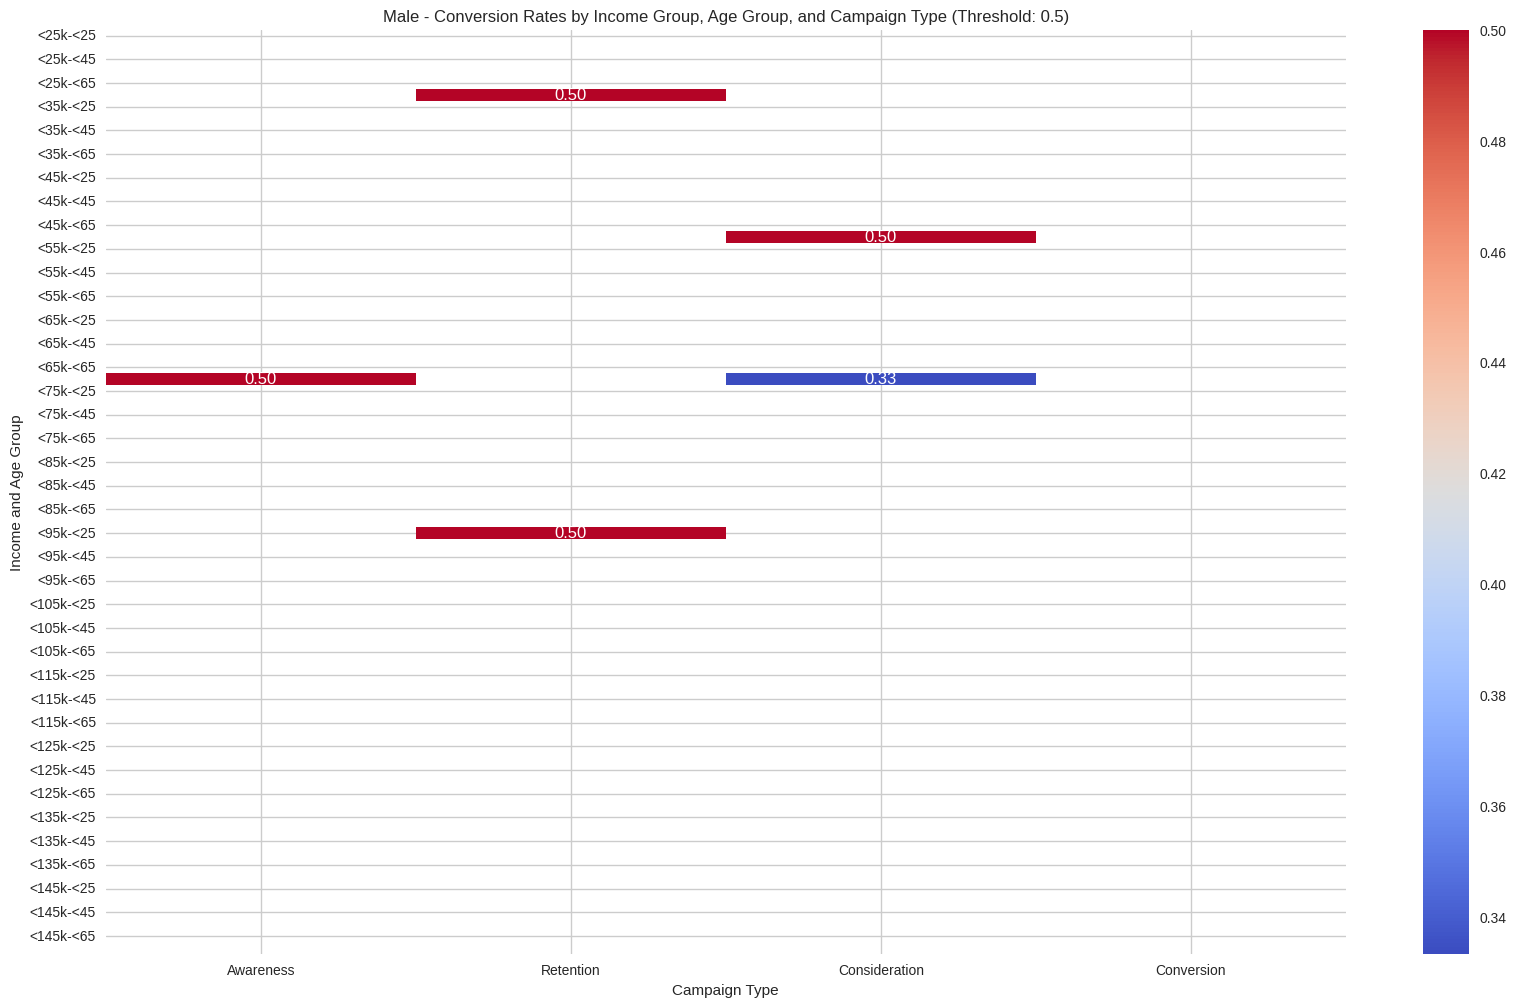

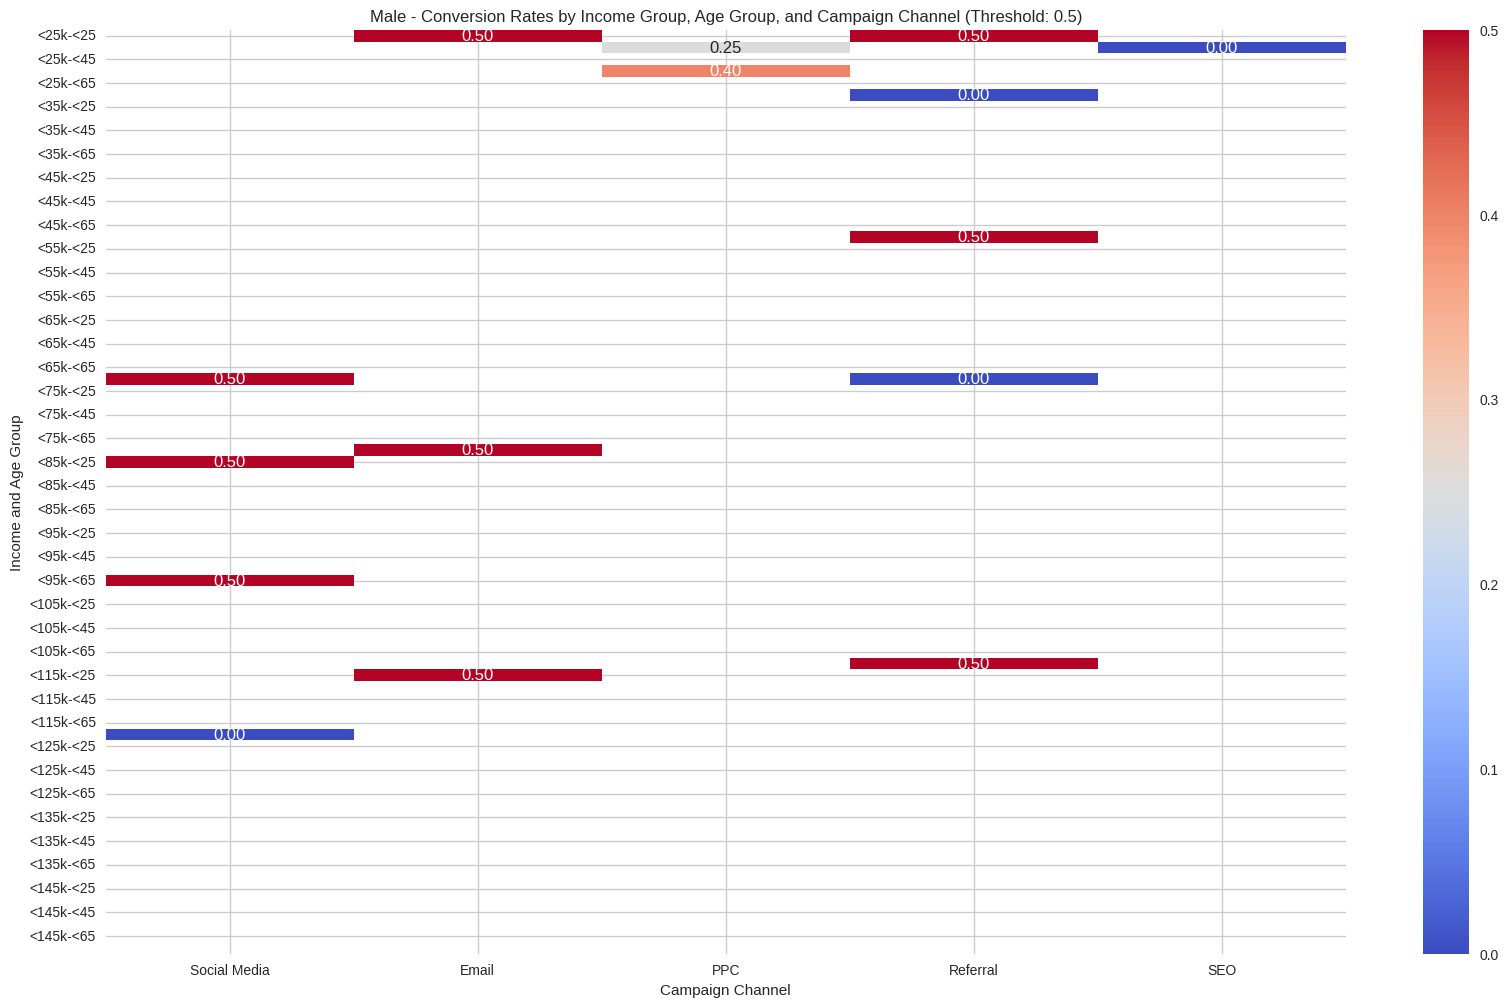

In [ ]:
#남성의 경우 고객 세분화 분석

df_male = df[df['Gender']=='Male']

male_campaign_conversion = df_male.groupby(['Income', 'Age', 'CampaignType'], observed=True)['Conversion'].mean().unstack()
male_channel_conversion = df_male.groupby(['Income', 'Age', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack()

# Conversion Rate가 0.9 이상인 값만 표시하도록 데이터 필터링
def filter_and_plot_heatmap(data, title, xlabel, ylabel, threshold=0.5):
    # 0.9 미만인 값은 NaN으로 처리 (히트맵에서 빈칸으로 표시됨)
    filtered_data = data.where(data <= threshold)

    plt.figure(figsize=(20, 12))
    sns.heatmap(filtered_data, annot=True, fmt=".2f", cmap="coolwarm", mask=filtered_data.isna())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 캠페인 타입별로 전환율 계산하기
filter_and_plot_heatmap(male_campaign_conversion,
                        'Male - Conversion Rates by Income Group, Age Group, and Campaign Type (Threshold: 0.5)',
                        'Campaign Type',
                        'Income and Age Group')

# 캠페인 채널별로 전환율 계산하기
filter_and_plot_heatmap(male_channel_conversion,
                        'Male - Conversion Rates by Income Group, Age Group, and Campaign Channel (Threshold: 0.5)',
                        'Campaign Channel',
                        'Income and Age Group')

**여성 캠페인 타입 별 전환 성과 부진 군집 시각화**

- Awareness 캠페인
    - 딱히 없음

- Retention 캠페인

    - 딱히 없음

- Consideration 캠페인

    - 소득 <75k, 나이 <25세 그룹의 경우 전환율이 33%로 해당 군집의 마케팅 전략 재고 필요
    - 마케팅 캠페인들 중 가장 성공적인 캠페인임.

- Conversion 캠페인

    - 전환율이 50프로 미만으로 나타나는 남성 군집이 없음.
    - 마케팅 캠페인들 중 가장 성공적인 캠페인임.


**여성 캠페인 채널 별 전환 성과 부진 군집 시각화**

- Social Media 채널
    - 소득 <125k, 나이 <25세 그룹의 경우 전환율이 0프로로 해당 군집의 채널 전략 재고 필요

- Email
    - 딱히 없음

- PPC 채널
    - 소득 <25K, 나이 <25세 그룹의 경우 전환율이 25%, 소득이 <25k, 나이 <45세 그룹의 경우 전환율이 45프로로 해당 군집의 마케팅 전략 재고 필요
    - 남성의 경우에도 해당 채널, 해당 군집에서 같은 비율로 전환되는 값을 보여 해당 특성을 가지고 있는 군집에 대한 채널 전략을 수정하는 것이 필요함.

- Referral
    - 소득 <25k, 나이 <65세 그룹의 경우 전환율이 0%, 소득 <65k, 나이 <65세 그룹의 경우 전환율이 0%이므로 해당 군집의 마케팅 전략 재고 필요
    - 뿐만 아니라, 남성의 경우 해당 채널의 마케팅 성과가 다른 채널에 비해 상대적으로 효과적이지 못함.
    - 남성의 경우에도 해당 채널, 해당 군집에서 같은 비율로 전환되는 값을 보여 해당 특성을 가지고 있는 군집에 대한 채널 전략을 수정하는 것이 필요함

- SEO
    - 여성을 대상으로 하는 마케팅 채널들 중 가장 효과가 좋은 채널
    - 소득 <25K, 나이 <25세 그룹의 경우 전환율이 0%로 해당 구집의 마케팅 전략 재고가 필요
    - 남성의 경우에도 해당 채널, 해당 군집에서 같은 비율로 전환되는 값을 보여 해당 특성을 가지고 있는 군집에 대한 채널 전략을 수정하는 것이 필요함

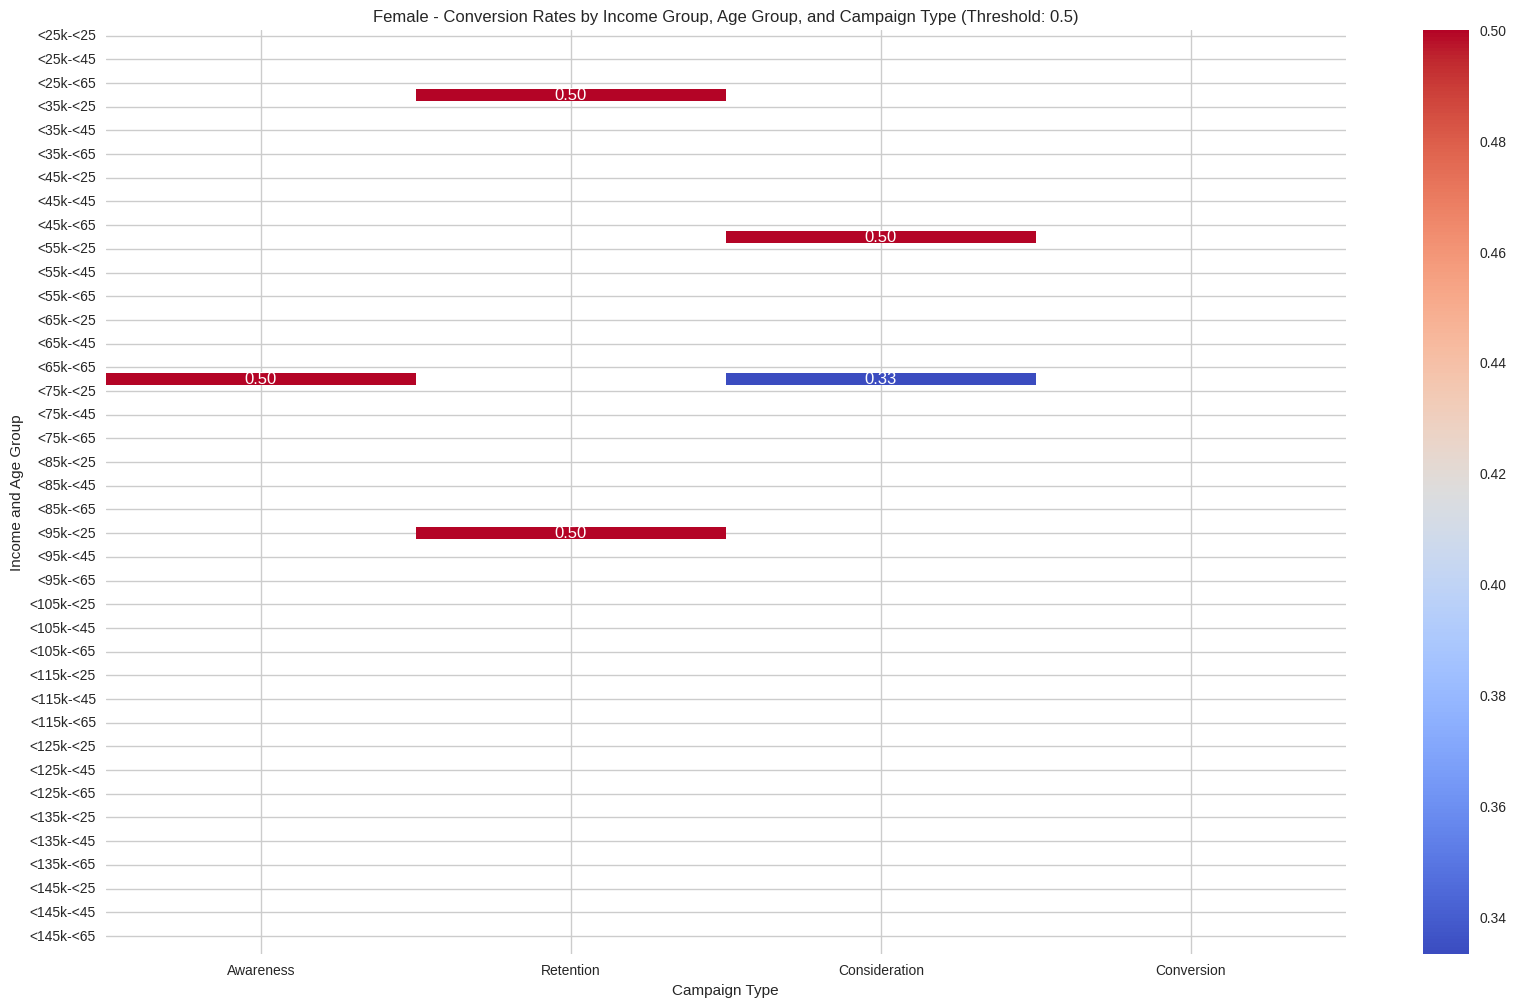

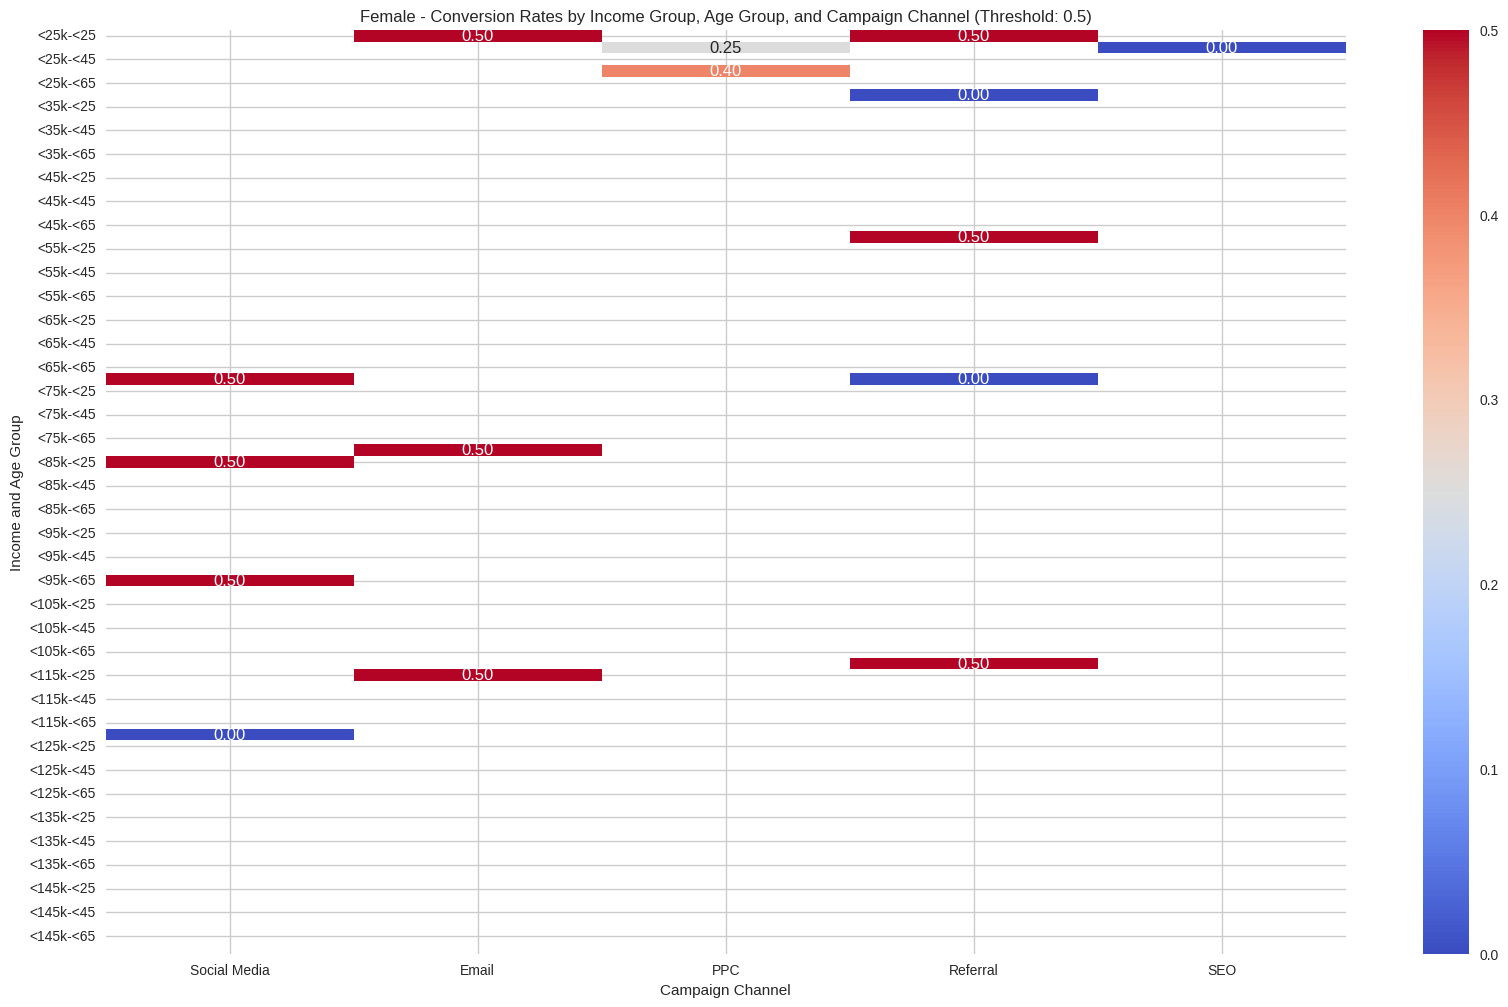

In [ ]:
#여성의 경우 고객 세분화 분석

df_female = df[df['Gender']=='Female']

female_campaign_conversion = df_female.groupby(['Income', 'Age', 'CampaignType'], observed=True)['Conversion'].mean().unstack()
female_channel_conversion = df_female.groupby(['Income', 'Age', 'CampaignChannel'], observed=True)['Conversion'].mean().unstack()

# Conversion Rate가 0.9 이상인 값만 표시하도록 데이터 필터링
def filter_and_plot_heatmap(data, title, xlabel, ylabel, threshold=0.5):
    # 0.9 미만인 값은 NaN으로 처리 (히트맵에서 빈칸으로 표시됨)
    filtered_data = data.where(data <= threshold)

    plt.figure(figsize=(20, 12))
    sns.heatmap(filtered_data, annot=True, fmt=".2f", cmap="coolwarm", mask=filtered_data.isna())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 캠페인 타입별로 전환율 계산하기
filter_and_plot_heatmap(male_campaign_conversion,
                        'Female - Conversion Rates by Income Group, Age Group, and Campaign Type (Threshold: 0.5)',
                        'Campaign Type',
                        'Income and Age Group')

# 캠페인 채널별로 전환율 계산하기
filter_and_plot_heatmap(male_channel_conversion,
                        'Female - Conversion Rates by Income Group, Age Group, and Campaign Channel (Threshold: 0.5)',
                        'Campaign Channel',
                        'Income and Age Group')

In [ ]:
#군집 전처리

# 데이터프레임 생성 (가정: 데이터는 이미 로드된 상태)

gender_mapping = {0: 'Male', 1: 'Female'}

income_mapping = {
    0: '<25k', 1: '<35k', 2: '<45k', 3: '<55k', 4: '<65k',
    5: '<75k', 6: '<85k', 7: '<95k', 8: '<105k', 9: '<115k',
    10: '<125k', 11: '<135k', 12: '<145k'
}

age_mapping = {
    0: '<25', 1: '<35', 2: '<45', 3: '<55', 4: '<65', 5: '>66'
}

# 변환 적용
df_conversion['Income_cat'] = df_conversion['Income_cat'].map(income_mapping)
df_conversion['Age_cat'] = df_conversion['Age_cat'].map(age_mapping)
df_conversion['Gender_cat'] = df_conversion['Gender_cat'].map(gender_mapping)

# 변환 결과 확인
print(df_conversion[['Income_cat', 'Age_cat']])


    Income_cat Age_cat
0         <25k     <25
1         <25k     <25
2         <25k     <25
3         <25k     <25
4         <25k     <35
..         ...     ...
307      <145k     <65
308      <145k     >66
309      <145k     >66
310      <145k     >66
311      <145k     >66

[312 rows x 2 columns]


- **클러스터 별 특징**
1. **Cluster 0**: 고소득(<105k), 중년(<65), 높은 인지도(0.849), 리텐션(0.861)과 전환율(0.931). 대부분 여성, 브랜드 관심 낮음.
2. **Cluster 1**: 고소득(<135k), 젊은 층(<25), 가장 높은 인지도(0.856),  리텐션(0.869), 전환율(0.931). 남성이 많고, 브랜드 관심도 낮음.
3. **Cluster 2**: 저소득(<25k), 노년층(>66), 낮은 인지도(0.804), 리텐션(0.832), 전환율(0.944). 남성이 많고, 브랜드 관심도 평균적.
4. **Cluster 3**: 고소득(<145k), 젊은 층(<35), 높은 전환율(0.920), 리텐션(0.884). 대부분 여성, 브랜드 관심도 상대적으로 높음.
5. **Cluster 4**: 저소득(<35k), 젊은 층(<25), 높은 전환율(0.936), 리텐션(0.846). 대부분 여성, 브랜드 관심도 높음.

In [ ]:
df_conversion

,Income_cat,Age_cat,Awareness,Retention,Consideration,Conversion,Social Media,Email,PPC,Referral,SEO,Gender_cat,count,BrandInterest,Clusters
0,<25k,<25,0.700000,0.625000,0.692308,1.000000,0.818182,0.538462,1.000000,0.666667,1.000000,Female,25,81.966182,0
1,<25k,<25,0.700000,0.625000,0.692308,1.000000,0.818182,0.538462,1.000000,0.666667,1.000000,Male,23,81.966182,0
2,<25k,<25,0.700000,0.625000,0.692308,1.000000,0.818182,0.538462,1.000000,0.666667,1.000000,Female,25,81.966182,0
3,<25k,<25,0.700000,0.625000,0.692308,1.000000,0.818182,0.538462,1.000000,0.666667,1.000000,Male,23,81.966182,0
4,<25k,<35,0.812500,0.722222,0.833333,1.000000,0.800000,0.785714,0.625000,1.000000,0.875000,Female,35,83.627084,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,<145k,<65,0.906250,0.925000,0.923077,0.883721,0.939394,0.863636,0.939394,0.843750,0.941176,Male,42,86.437434,4
308,<145k,>66,0.894737,0.818182,0.863636,1.000000,0.947368,1.000000,0.823529,0.950000,0.764706,Female,60,83.554973,1
309,<145k,>66,0.894737,0.818182,0.863636,1.000000,0.947368,1.000000,0.823529,0.950000,0.764706,Male,24,83.554973,3
310,<145k,>66,0.894737,0.818182,0.863636,1.000000,0.947368,1.000000,0.823529,0.950000,0.764706,Female,60,83.554973,4


In [ ]:
# 군집별 통계 요약
cluster_summary = df_conversion.groupby('Clusters').agg({
    'Income_cat': lambda x: x.mode()[0],  # 최빈값(군집 내 가장 흔한 값)
    'Age_cat': lambda x: x.mode()[0],     # 최빈값
    'Awareness': ['mean', 'std'],
    'Retention': ['mean', 'std'],
    'Consideration': ['mean', 'std'],
    'Conversion': ['mean', 'std'],
    'Gender_cat': lambda x: x.mode()[0],  # 최빈값
    'Social Media': ['mean', 'std'],
    'Email': ['mean', 'std'],
    'PPC': ['mean', 'std'],
    'Referral': ['mean', 'std'],
    'SEO': ['mean', 'std'],
    'BrandInterest': ['mean', 'std'],
    'count': ['sum', 'std']
}).reset_index()

# 새로운 컬럼 이름 지정
cluster_summary.columns = [
    'Cluster', 'Most_Common_Income', 'Most_Common_Age',
    'Awareness_Mean', 'Awareness_Std',
    'Retention_Mean', 'Retention_Std',
    'Consideration_Mean', 'Consideration_Std',
    'Conversion_Mean', 'Conversion_Std',
    'Most_Common_Gender', 'Social Media_Mean','Social Media_Std',
    'Email_Mean', 'Email_Std', 'PPC_Mean', 'PPC_Std',
    'Referral_Mean', 'Referral_Std', 'SEO_Mean', 'SEO_Std',
    'BrandInterest_Mean', 'BrandInterest_Std', 'count_sum', 'count_std'
]

# 결과 출력
print(cluster_summary)


   Cluster Most_Common_Income Most_Common_Age  Awareness_Mean  Awareness_Std  \
0        0               <25k             >66        0.805366       0.104996   
1        1              <105k             <55        0.857782       0.061045   
2        2              <145k             <45        0.858985       0.058022   
3        3               <75k             <65        0.862328       0.056869   
4        4               <65k             <25        0.861020       0.060980   

   Retention_Mean  Retention_Std  Consideration_Mean  Consideration_Std  \
0        0.827970       0.142455            0.801408           0.124307   
1        0.845479       0.065298            0.863792           0.061398   
2        0.879369       0.061491            0.861568           0.059931   
3        0.867842       0.068768            0.867383           0.067498   
4        0.870456       0.072778            0.863094           0.076307   

   Conversion_Mean  ...  PPC_Mean   PPC_Std  Referral_Mean  Referral

**1. Cluster 0**
- 소득 및 연령: 가장 낮은 소득(25k 이하)과 가장 높은 연령대(66세 이상)가 주를 이룹니다.
- Awareness & Retention: Awareness(인지도)와 Retention(유지율) 평균값이 비교적 낮습니다.
- Conversion(전환율): Conversion(전환율)은 0.940으로 높은 편.
- Brand Interest(브랜드 관심도): 평균이 85.72로 높지만, 표준편차(5.77)가 다소 큽니다.
- 군집 규모: 상대적으로 작은 규모(1580명)로 구성.


**2. Cluster 1**
- 소득 및 연령: 중간 소득(105k 미만)과 중년층(55세 미만)이 주를 이룹니다.
- Awareness & Retention: Awareness(0.857)와 Retention(0.845) 모두 평균 이상입니다.
- Conversion(전환율): Conversion은 0.930으로 높습니다.
- Brand Interest: 평균은 85.52로 안정적이며 표준편차(3.61)가 낮아, 비교적 일관된 관심도를 보여줍니다.
군집 규모: 가장 큰 규모(6127명).



**3. Cluster 2**
- 소득 및 연령: 높은 소득(145k 미만)과 젊은 연령층(45세 미만)이 포함됩니다.
- Awareness & Retention: Awareness(0.859)와 Retention(0.879) 모두 가장 높은 수준에 가깝습니다.
- Conversion(전환율): Conversion은 0.939로 우수합니다.
- Brand Interest: 평균(84.32)은 약간 낮지만, 안정적입니다(표준편차 3.81).
- 군집 규모: 중간 규모(2477명).


**4. Cluster 3**
- 소득 및 연령: 중간 소득(75k 미만)과 장년층(65세 미만)이 포함됩니다.
- Awareness & Retention: Awareness(0.862)와 Retention(0.868)은 안정적이고 높은 수준입니다.
- Conversion(전환율): Conversion은 0.939로 매우 높습니다.
- Brand Interest: 평균(85.42)은 높은 수준이며, 표준편차(4.41)는 적당히 안정적입니다.
- 군집 규모: 비교적 작은 규모(1782명).


**5. Cluster 4**
- 소득 및 연령: 중간 소득(65k 미만)과 젊은 층(25세 미만)이 포함됩니다.
- Awareness & Retention: Awareness(0.861)과 Retention(0.870)은 안정적입니다.
- Conversion(전환율): Conversion은 0.933으로 높습니다.
- Brand Interest: 평균(85.18)은 다소 높은 편이나, 표준편차(5.09)가 있어 분산이 존재합니다.
- 군집 규모: 중간 규모(4034명).


**요약**


- Cluster 0: 낮은 소득, 고령층이 주인 군집, 높은 브랜드 관심도를 가지고 있지만, 편차가 큼. 또한, 다른 군집들에 미해서 인지, 리텐션, 고려 마케팅의 성공률이 비교적 낮음. 하지만 높은 전환 마케팅 성공률을 가짐.
- Cluster 1: 중간 소득, 중년층이 주인 군집, 마케팅 성과가 대부분 안정적이고 대규모 인원이 소속되어 있는 군집.
- Cluster 2: 높은 소득, 젊은 층이 주인 군집, 높은 인지 마케팅 성공률과 상대적으로 높은 리텐션 마케팅 성공률을 보임.
- Cluster 3: 중간 소득, 장년층이 주인 군집, 마케팅 성과가 비교적 안정적이고 충성도가 가장 높은 군집.
- Cluster 4: 중간 소득, 젊은 층이 주인 군집, 전반적으로 모든 마케팅에서 안정적인 성과를 보여주고 있음.


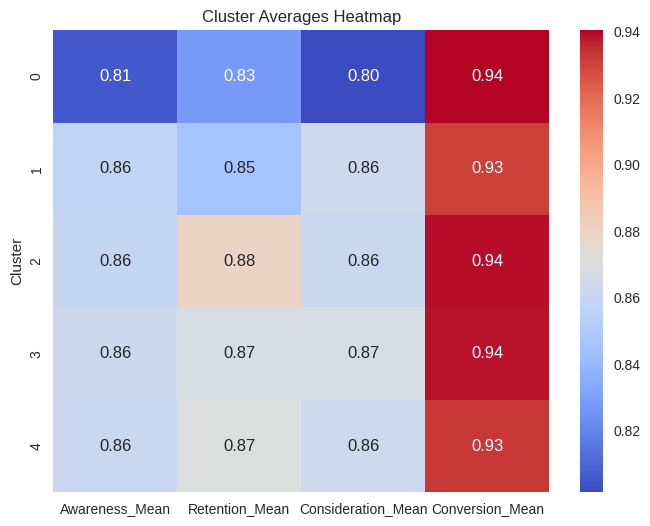

In [ ]:
# 고객 클러스터별 히트맵 정리
summary_for_heatmap = cluster_summary.set_index('Cluster')[
    ['Awareness_Mean', 'Retention_Mean', 'Consideration_Mean', 'Conversion_Mean']
]
plt.figure(figsize=(8, 6))
sns.heatmap(summary_for_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cluster Averages Heatmap')
plt.show()


- 4번 군집의 경우, 왜 리텐션 마케팅, 전환 마케팅을 통한 구매율이 가장 높았을까?
- 3번 군집의 경우, 인지 마케팅, 고려 마케팅을 통한 구매율이 다른 군집에 비해 낮게 나타나면서, 전환 마케팅에서 전환율이 높은 이유는 뭘까?



 --->> 분석

#  군집 별로 어떤 마케팅 채널이 가장 성과가 좋았을까?

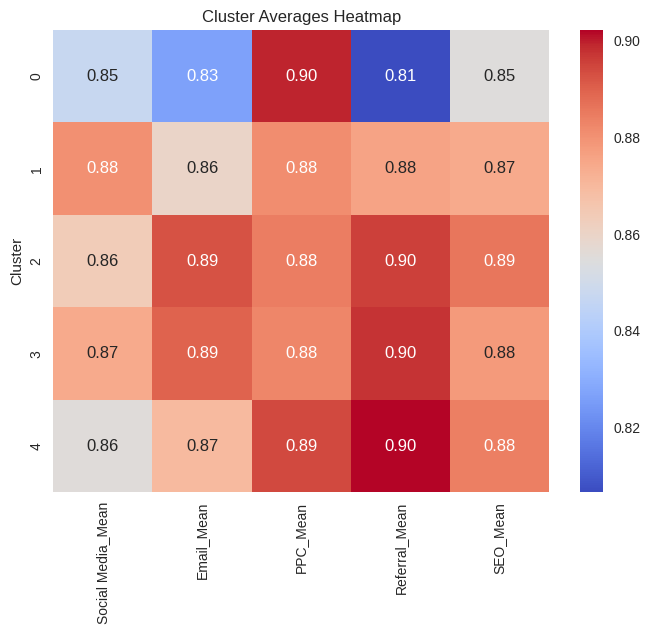

In [ ]:
summary_for_heatmap = cluster_summary.set_index('Cluster')[
    ['Social Media_Mean', 'Email_Mean', 'PPC_Mean', 'Referral_Mean','SEO_Mean']
]
plt.figure(figsize=(8, 6))
sns.heatmap(summary_for_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cluster Averages Heatmap')
plt.show()

# 충성도에 따라 마케팅 캠페인 효과가 다르게 나타날까?

- 브랜드 충성도 점수가 낮음의 경우보다 더 높게 갈 경우, 제품의 구매로 이어지는 경우가 8% 이상 상승함.
- 브랜드 충성도 점수의 경우 이메일 열람, 페이지 체류 시간, 재구매, 충성도 포인트 등이 포함되어 있는데 'Email Open(0.0149)', 'PagesPerVisit(0.0132)', PreviousPurchases(0.0127)'의 경우가 가장 브랜드 충성도에 기여하는 인자임

In [ ]:
# 충성도 quantile

df['BrandInterest'].quantile([0.25, 0.5, 0.75, 1])

,BrandInterest
0.25,46.921692
0.50,85.213651
0.75,122.689129
1.00,163.565333


In [ ]:
# 브랜드 충성도 별로 클러스터 만들기

def brand_cluster(x):
    if x<47:
        return 'Low'
    elif x<86:
        return 'medium'
    elif x<123:
        return 'high'
    else:
        return 'very high'

df['Brand_Cluster'] = df['BrandInterest'].apply(brand_cluster)

In [ ]:
# 브랜드 충성도가 Low 이상일 경우 직접 제품의 구매로 이어지는 경우의 비율이 낮음
# 브랜드 충성도가 Low보다 높기만 해도 제품의 구매로 이어지는 비율이 급격히 올라감

df.groupby(['Brand_Cluster'])['Conversion'].mean()

,Conversion
Brand_Cluster,
Low,0.814685
high,0.895802
medium,0.892436
very high,0.903275
